In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [20]:
sheet_id = "1ue2SL2gjcrj--SGe78JmGO0LNuIQwje9ANqarMgPddE"
sheet_name = "Sheet1"
google_sheet_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?gid=0&format=csv"

input_cols = ['team_one_color', 'team_one_name', 'team_one_player1',
       'team_one_player2', 'team_one_player3', 'team_one_player4',
       'team_one_player5', 'team_two_color', 'team_two_name',
       'team_two_player6', 'team_two_player7', 'team_two_player8',
       'team_two_player9', 'team_two_player10', 'text']

output_cols = ['output']


In [27]:
df = pd.read_csv(google_sheet_url)
df['output'] = df['win_team']==df['team_one_name']
df['input'] = [' '.join(row) for index, row in df[input_cols].iterrows()]


X_train, X_test, y_train, y_test = train_test_split(df['input'], df['output'], test_size=0.33, random_state=42)
df.head()

,team_one_color,team_one_name,team_one_player1,team_one_player2,team_one_player3,team_one_player4,team_one_player5,team_two_color,team_two_name,team_two_player6,team_two_player7,team_two_player8,team_two_player9,team_two_player10,win_team,text,video_link,output,input
0,blue,C9,FUDGE,BLABER,JENSEN,BERSERKER,ZVEN,red,100,SSUMDAY,CLOSER,ABBEDAGGE,FBI,HUHI,C9,0:00\n to get the better of someday in their p...,https://www.youtube.com/watch?v=wFe2n8AU9ok,True,blue C9 FUDGE BLABER JENSEN BERSERKER ZVEN red...
1,blue,RNG,BIN,WEI,XIAOHU,GALA,MING,red,T1,ZEUS,ONER,FAKER,GUMAYUSI,KERIA,RNG,0:00\n the blue side they won a coin toss yest...,https://www.youtube.com/watch?v=k4HC8g4rD1U,True,blue RNG BIN WEI XIAOHU GALA MING red T1 ZEUS ...
2,blue,JDG,369,KANAVI,YAGAO,HOPE,MISSING,red,RGE,ODOAMNE,MALRANG,LARSSEN,COMP,TRYMBI,JDG,0:00\n say it immediately gets locked in I thi...,https://www.youtube.com/watch?v=AqQ_orDW6Qo,True,blue JDG 369 KANAVI YAGAO HOPE MISSING red RGE...
3,blue,GEN,DORAN,PEANUT,CHOVY,RULER,LEHENDS,red,T1,ZEUS,ONER,FAKER,GUMAYUSI,KERIA,T1,0:00\n pretty well at those power spikes set u...,https://www.youtube.com/watch?v=2WnF6lKmjYM,False,blue GEN DORAN PEANUT CHOVY RULER LEHENDS red ...
4,blue,GEN,DORAN,PEANUT,CHOVY,RULER,LEHENDS,red,DK,NUGURI,CANYON,SHOWMAKER,DEOKDAM,KELLIN,GEN,0:00\n absolutely I mean Dom wanna you feel li...,https://www.youtube.com/watch?v=o8j5_L6qro4,True,blue GEN DORAN PEANUT CHOVY RULER LEHENDS red ...


In [28]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df['input'])
X_train_counts.shape

(48, 10014)

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape


(48, 10014)

In [30]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, df[output_cols].values.ravel())

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None))])
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [32]:
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test)

0.4375

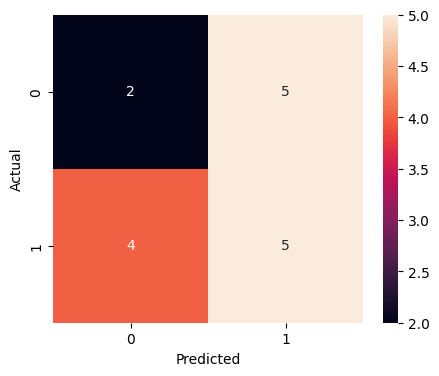

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


conf_mat = confusion_matrix(y_test, predicted)
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()